In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve
)
from imblearn.combine import SMOTETomek
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
def build_dnn(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model
def evaluate_model(y_test, y_prob, title_prefix):
    y_pred = (y_prob > 0.5).astype(int)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f"{title_prefix} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{title_prefix} - ROC Curve")
    plt.legend()
    plt.show()
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure()
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{title_prefix} - Precision Recall Curve")
    plt.show()

In [3]:
print("Loading dataset...")
data = pd.read_csv(r"C:\Users\madha\Downloads\creditcard.csv")
print("Dataset loaded successfully")
X = data.drop(['Class', 'Time'], axis=1)
y = data['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Preprocessing completed")

Loading dataset...
Dataset loaded successfully
Preprocessing completed



Training WITHOUT SMOTE (80–20)
Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.9577 - loss: 0.1639 - val_accuracy: 0.9986 - val_loss: 0.0599
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.9987 - loss: 0.0126 - val_accuracy: 0.9993 - val_loss: 0.0070
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9989 - loss: 0.0075 - val_accuracy: 0.9993 - val_loss: 0.0040
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.9991 - loss: 0.0057 - val_accuracy: 0.9994 - val_loss: 0.0039
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9991 - loss: 0.0049 - val_accuracy: 0.9994 - val_loss: 0.0038
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.9991 - loss: 0.0047 - val_accuracy: 0.9994 - val_loss: 0.0038
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.9992 - loss: 0.0045 - val_accuracy: 0.9994 - val_loss: 0.0038
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.9991 - lo

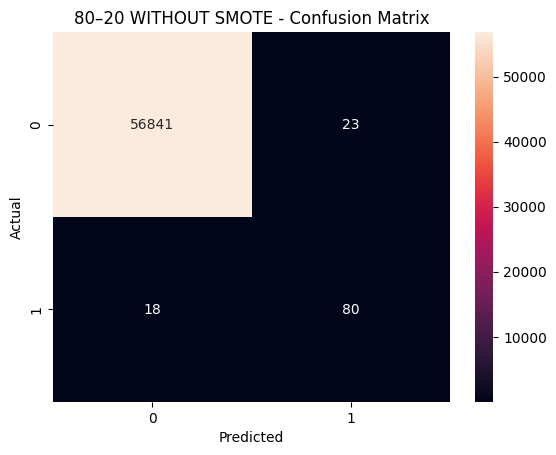

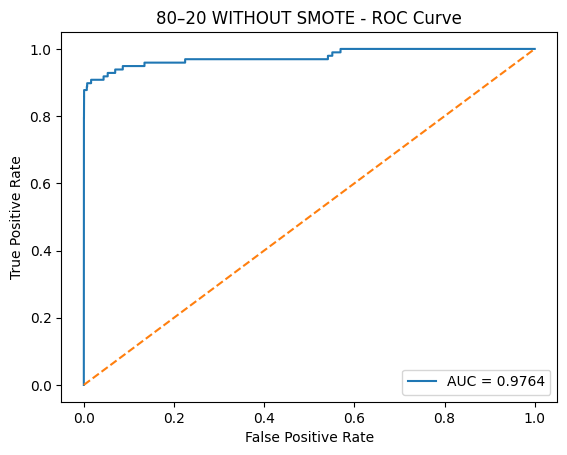

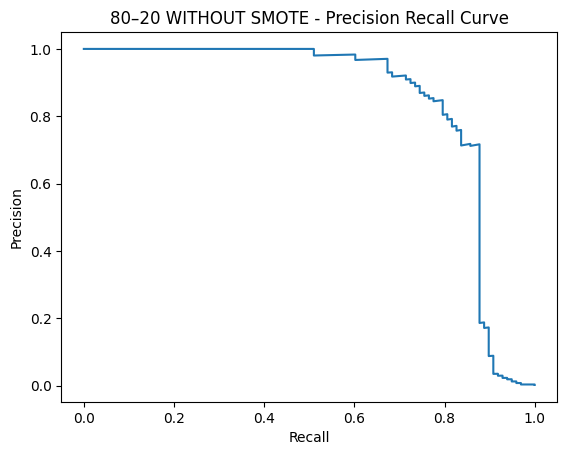


Applying SMOTE-Tomek...
Training WITH SMOTE (80–20)
Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.9531 - loss: 0.1283 - val_accuracy: 0.9772 - val_loss: 0.0699
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9849 - loss: 0.0409 - val_accuracy: 0.9967 - val_loss: 0.0172
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9912 - loss: 0.0250 - val_accuracy: 1.0000 - val_loss: 0.0066
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.9943 - loss: 0.0175 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.9959 - loss: 0.0132 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.9969 - loss: 0.0106 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9974 - loss: 0.0087 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 

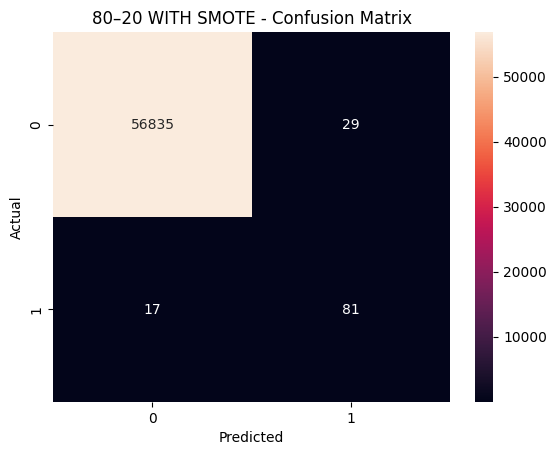

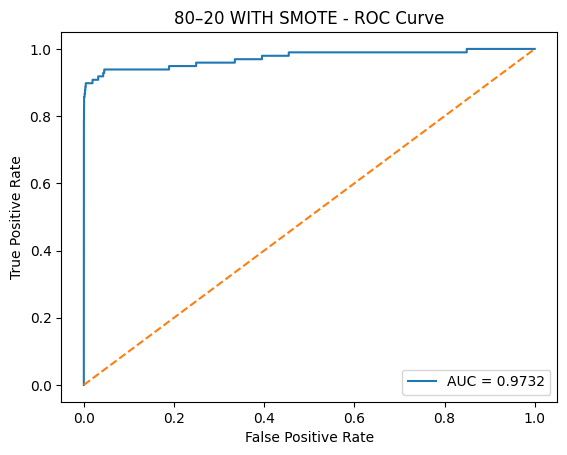

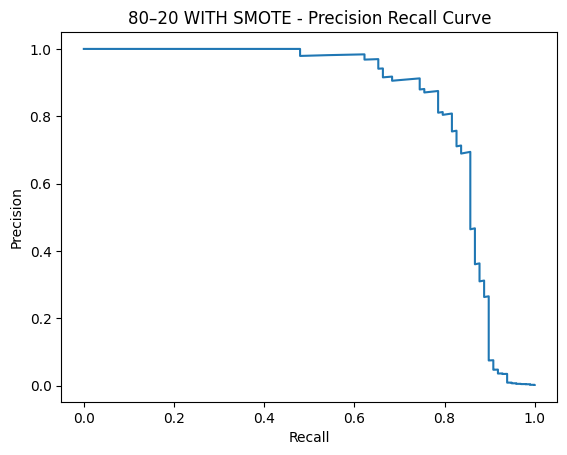

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)
# ---------- WITHOUT SMOTE ----------
print("\nTraining WITHOUT SMOTE (80–20)")
model = build_dnn(X_train.shape[1])
model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=2048,
    validation_split=0.2,
    verbose=1
)
y_prob = model.predict(X_test)
evaluate_model(y_test, y_prob, "80–20 WITHOUT SMOTE")
# ---------- WITH SMOTE ----------
print("\nApplying SMOTE-Tomek...")
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)
print("Training WITH SMOTE (80–20)")
model = build_dnn(X_res.shape[1])
model.fit(
    X_res, y_res,
    epochs=50,
    batch_size=2048,
    validation_split=0.2,
    verbose=1
)
y_prob = model.predict(X_test)
evaluate_model(y_test, y_prob, "80–20 WITH SMOTE")

Training 70–30 Split
Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.9494 - loss: 0.1731 - val_accuracy: 0.9982 - val_loss: 0.0816
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9986 - loss: 0.0138 - val_accuracy: 0.9991 - val_loss: 0.0088
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9988 - loss: 0.0074 - val_accuracy: 0.9993 - val_loss: 0.0042
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9990 - loss: 0.0056 - val_accuracy: 0.9994 - val_loss: 0.0038
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9991 - loss: 0.0047 - val_accuracy: 0.9994 - val_loss: 0.0039
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9992 - loss: 0.0043 - val_accuracy: 0.9993 - val_loss: 0.0039
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.9993 - loss: 0.0040 - val_accuracy: 0.9993 - val_loss: 0.0039
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9993 - loss: 0.0035 - va

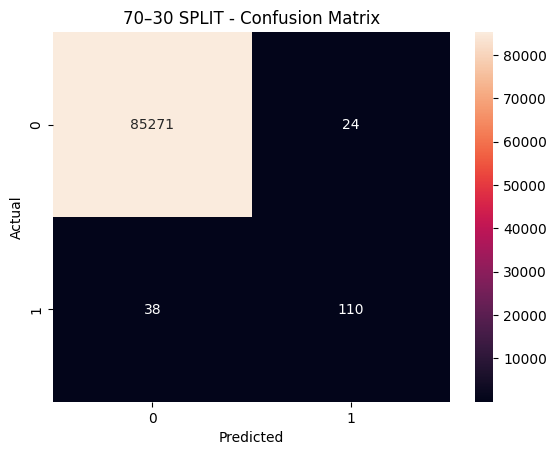

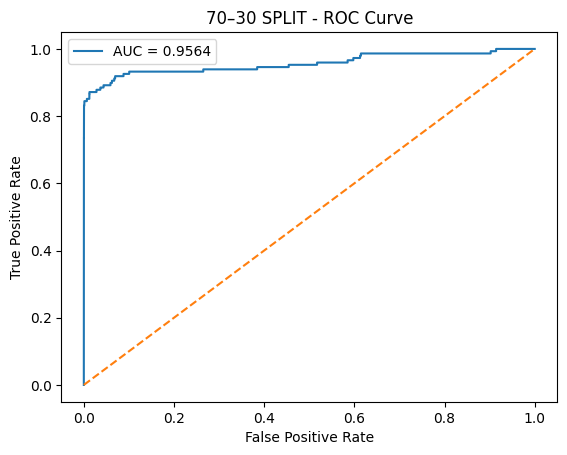

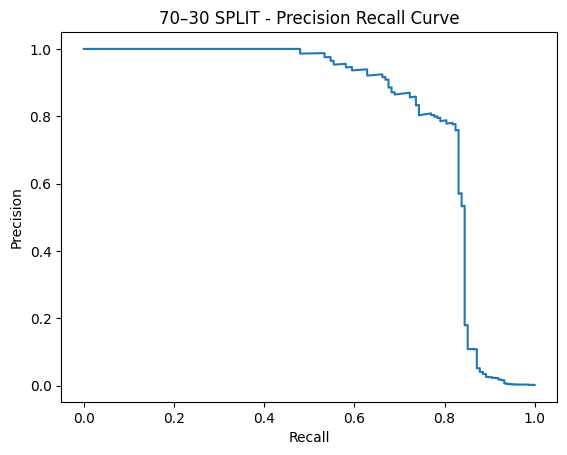

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)
print("Training 70–30 Split")
model = build_dnn(X_train.shape[1])
model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=2048,
    validation_split=0.2,
    verbose=1
)
y_prob = model.predict(X_test)
evaluate_model(y_test, y_prob, "70–30 SPLIT")

Training 60–20–20 Split
Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9963 - loss: 0.0692 - val_accuracy: 0.9984 - val_loss: 0.0540
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.9986 - loss: 0.0085 - val_accuracy: 0.9993 - val_loss: 0.0072
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9990 - loss: 0.0058 - val_accuracy: 0.9993 - val_loss: 0.0043
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.9992 - loss: 0.0047 - val_accuracy: 0.9993 - val_loss: 0.0042
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9993 - loss: 0.0042 - val_accuracy: 0.9993 - val_loss: 0.0043
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9993 - loss: 0.0040 - val_accuracy: 0.9993 - val_loss: 0.0044
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9993 - val_loss: 0.0043
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9993 - loss: 0.0036 -

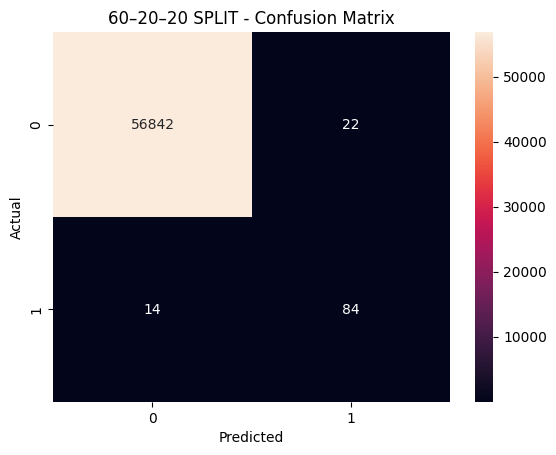

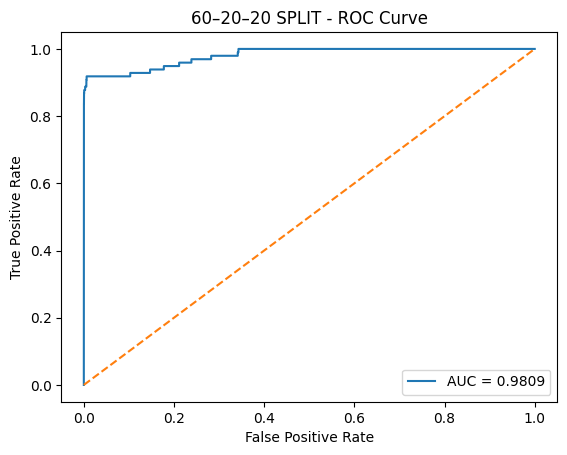

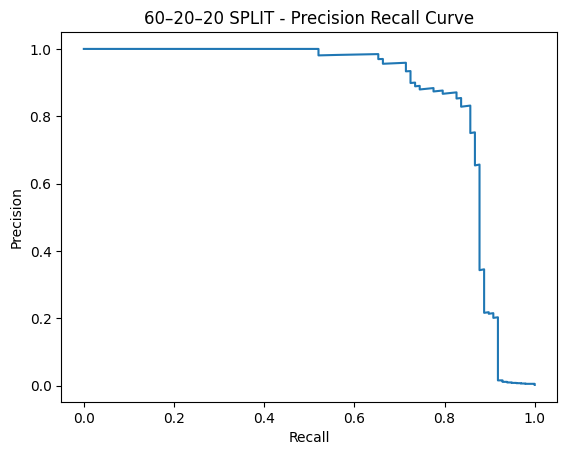

In [6]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)
print("Training 60–20–20 Split")
model = build_dnn(X_train.shape[1])
model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=2048,
    validation_data=(X_val, y_val),
    verbose=1
)
y_prob = model.predict(X_test)
evaluate_model(y_test, y_prob, "60–20–20 SPLIT")

Training 70–15–15 Split
Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - accuracy: 0.8645 - loss: 0.2959 - val_accuracy: 0.9992 - val_loss: 0.0615
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9989 - loss: 0.0141 - val_accuracy: 0.9994 - val_loss: 0.0067
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9991 - loss: 0.0075 - val_accuracy: 0.9994 - val_loss: 0.0037
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9991 - loss: 0.0057 - val_accuracy: 0.9994 - val_loss: 0.0034
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9992 - loss: 0.0051 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9993 - loss: 0.0044 - val_accuracy: 0.9994 - val_loss: 0.0035
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.9993 - loss: 0.0046 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9993 - loss: 0.0039 -

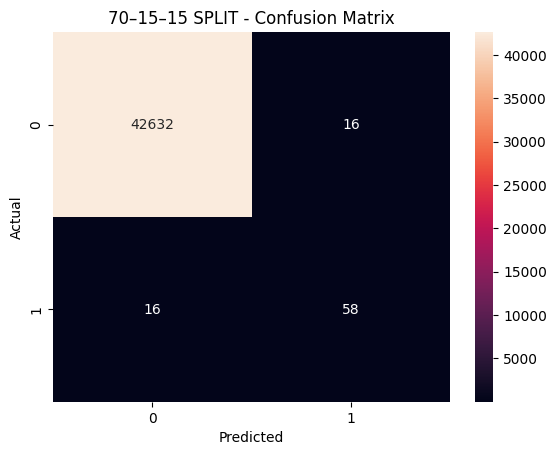

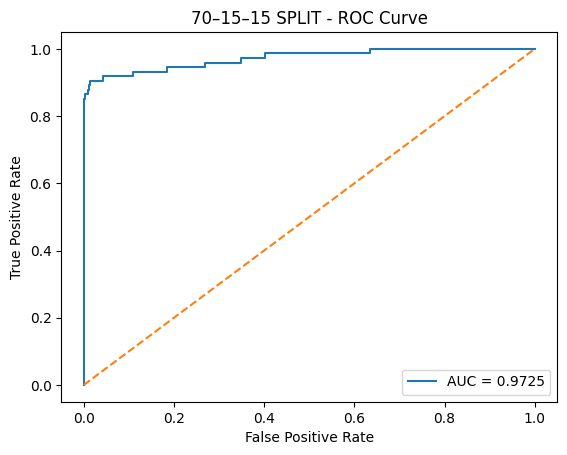

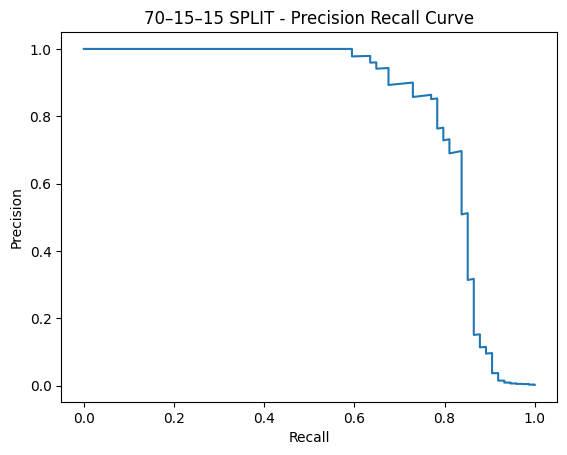

In [7]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.15, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, stratify=y_temp, random_state=42
)
print("Training 70–15–15 Split")
model = build_dnn(X_train.shape[1])
model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=2048,
    validation_data=(X_val, y_val),
    verbose=1
)
y_prob = model.predict(X_test)
evaluate_model(y_test, y_prob, "70–15–15 SPLIT")


Training Fold 1
Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9496 - loss: 0.1724
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.9989 - loss: 0.0096
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9991 - loss: 0.0058
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.9992 - loss: 0.0046
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.9992 - loss: 0.0043
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9992 - loss: 0.0038
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.9993 - loss: 0.0038
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.9993 - loss: 0.0037
Epoch 9/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.9993 - loss: 0.0034
Epoch 10/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9993 - loss: 0.0033
Epoch 11/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9993 - loss: 0.0032
Epoch 12/50
112/112 

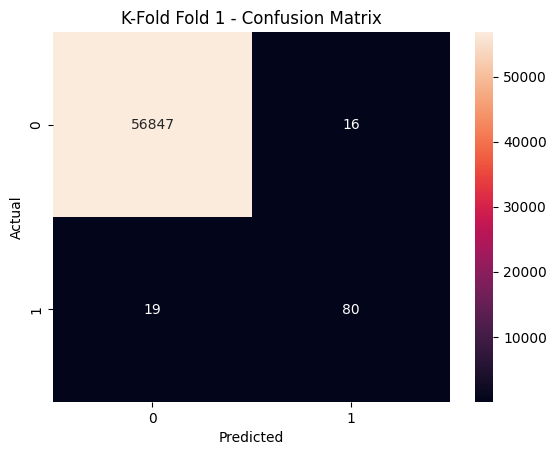

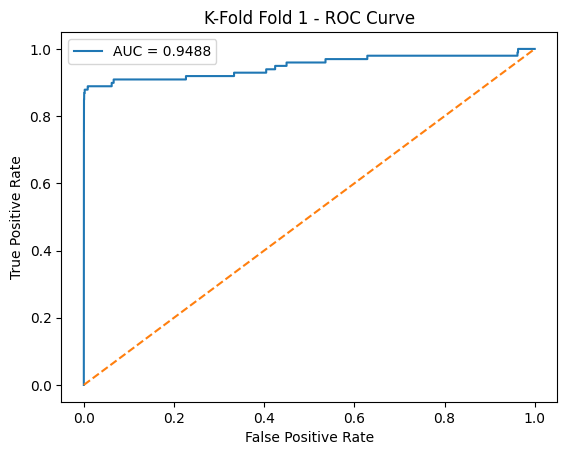

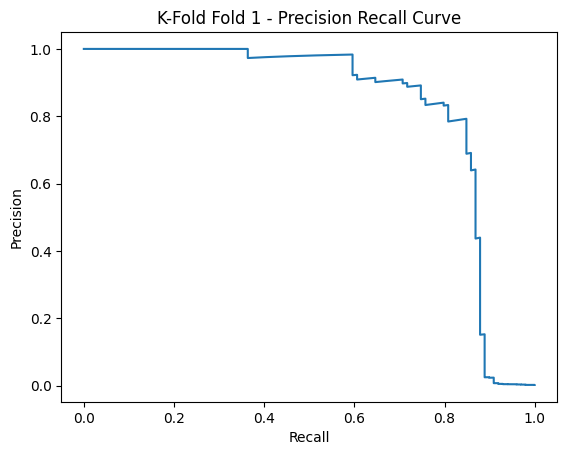


Training Fold 2
Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.8595 - loss: 0.2990
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.9988 - loss: 0.0149
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.9990 - loss: 0.0076
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.9991 - loss: 0.0058
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9992 - loss: 0.0049
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9992 - loss: 0.0046
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9992 - loss: 0.0043
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.9993 - loss: 0.0041
Epoch 9/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.9992 - loss: 0.0041
Epoch 10/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.9993 - loss: 0.0041
Epoch 11/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.9993 - loss: 0.0038
Epoch 12/50
112/

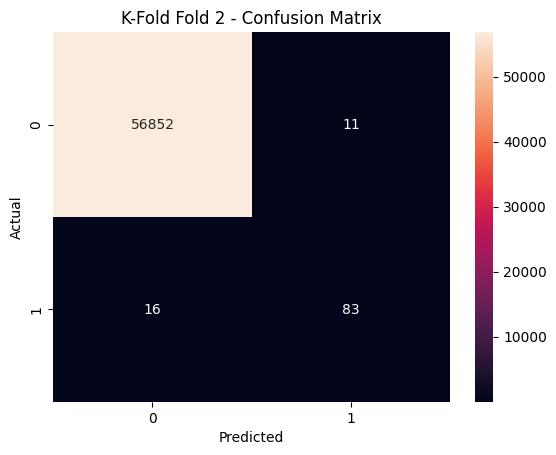

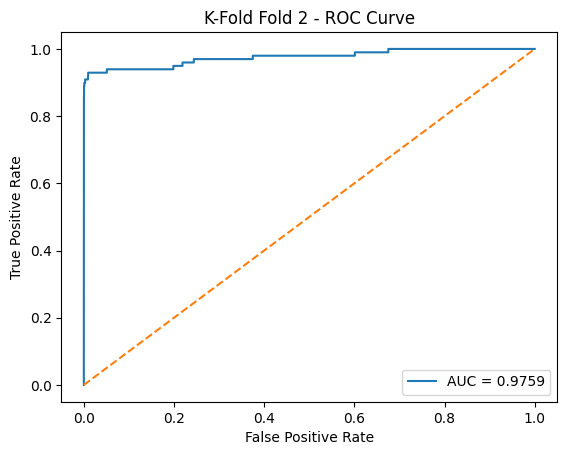

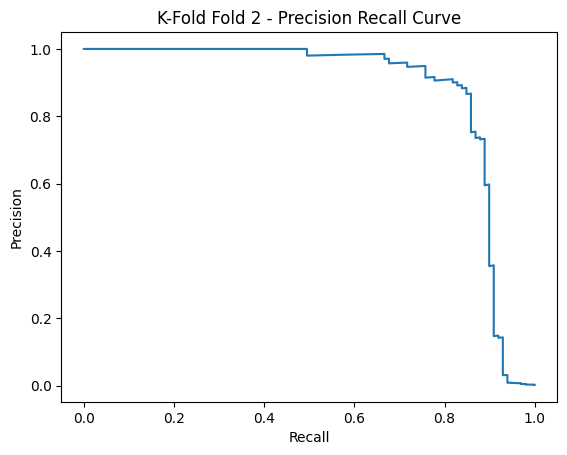


Training Fold 3
Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.8840 - loss: 0.2572
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.9987 - loss: 0.0141
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9991 - loss: 0.0077
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.9991 - loss: 0.0062
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.9992 - loss: 0.0053
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9992 - loss: 0.0049
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9992 - loss: 0.0046
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9991 - loss: 0.0046
Epoch 9/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9992 - loss: 0.0045
Epoch 10/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9992 - loss: 0.0043
Epoch 11/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9992 - loss: 0.0040
Epoch 12/50
112/112 ━━

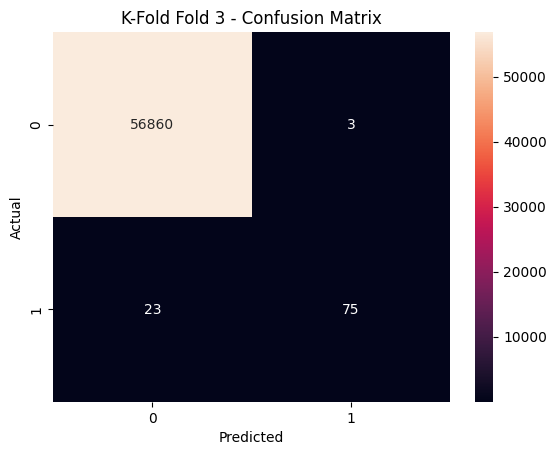

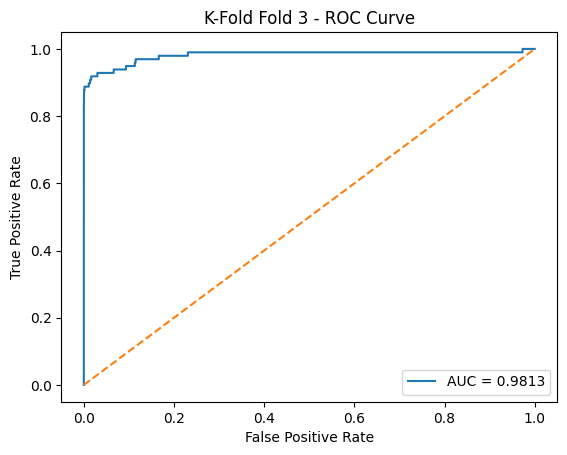

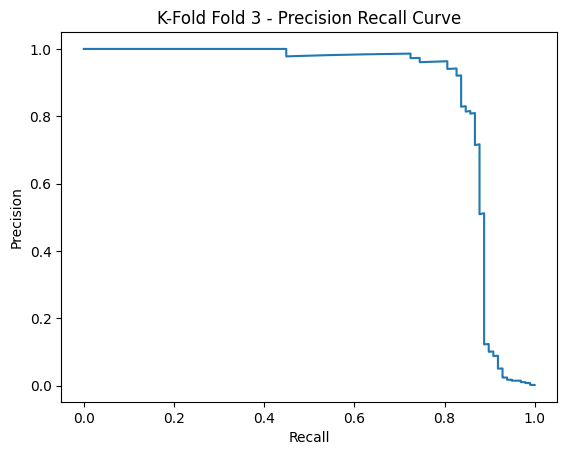


Training Fold 4
Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9828 - loss: 0.1000
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9987 - loss: 0.0085
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9990 - loss: 0.0058
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9991 - loss: 0.0048
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9991 - loss: 0.0045
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9992 - loss: 0.0043
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9992 - loss: 0.0041
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9992 - loss: 0.0039
Epoch 9/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9993 - loss: 0.0036
Epoch 10/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9992 - loss: 0.0036
Epoch 11/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9992 - loss: 0.0034
Epoch 12/50
112/112 ━━━━

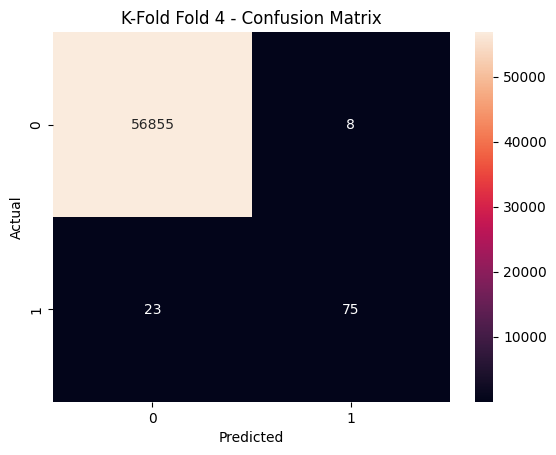

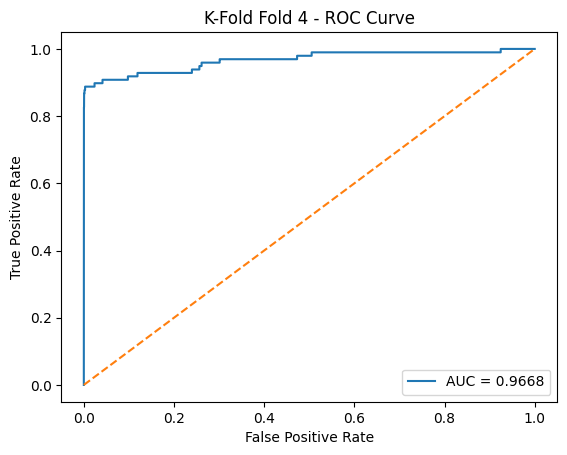

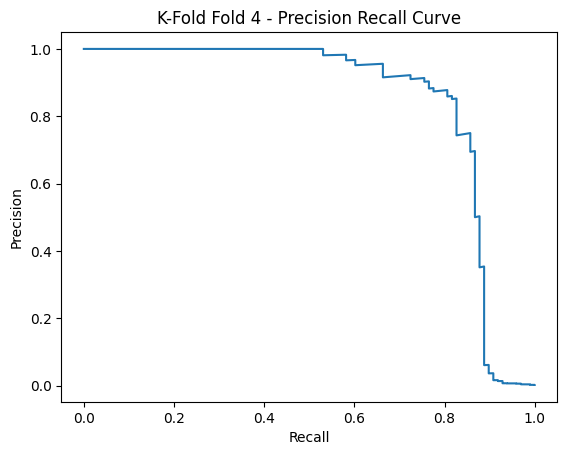


Training Fold 5
Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9281 - loss: 0.1693
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9989 - loss: 0.0104
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9991 - loss: 0.0067
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9991 - loss: 0.0053
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9992 - loss: 0.0050
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9992 - loss: 0.0045
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9992 - loss: 0.0043
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9993 - loss: 0.0041
Epoch 9/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9993 - loss: 0.0039
Epoch 10/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9993 - loss: 0.0038
Epoch 11/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9993 - loss: 0.0038
Epoch 12/50
112/112 ━━━━

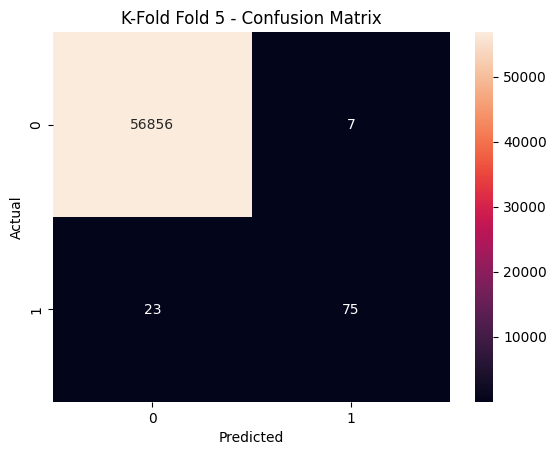

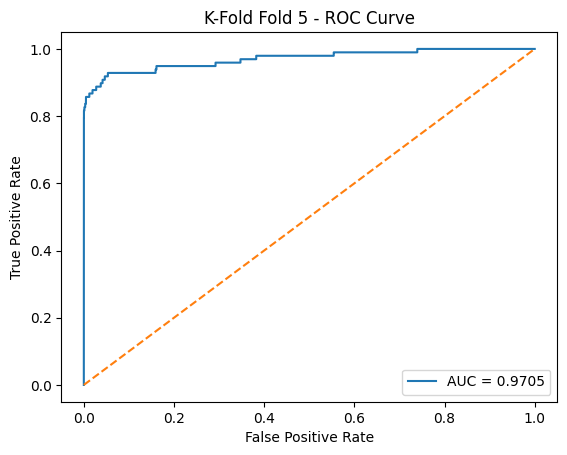

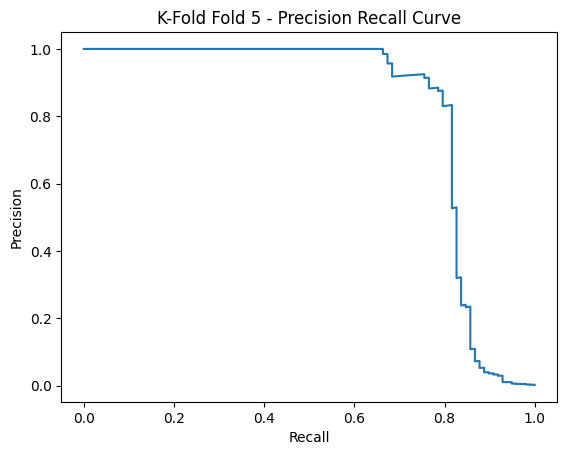

In [9]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
for train_idx, test_idx in skf.split(X_scaled, y):
    print(f"\nTraining Fold {fold}")
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model = build_dnn(X_train.shape[1])
    model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=2048,
        verbose=1
    )
    y_prob = model.predict(X_test)
    evaluate_model(y_test, y_prob, f"K-Fold Fold {fold}")
    fold += 1